# Homework 1
Author: Mao Nishino

In [1]:
#import relevant libraries
import pandas as pd
from sklearn import tree, metrics, ensemble
import matplotlib.pyplot as plt
from math import sqrt, log

In [ ]:
# import the dataset from local files

# madelon
madelon_x_url = "./MADELON/madelon_train.data"
madelon_y_url = "./MADELON/madelon_train.labels"
madelon_x_test_url = "./MADELON/madelon_valid.data"
madelon_y_test_url = "./MADELON/madelon_valid.labels"
madelon_x = pd.read_csv(madelon_x_url, header=None, delim_whitespace=True)
madelon_y = pd.read_csv(madelon_y_url, header=None, delim_whitespace=True)
madelon_x_test = pd.read_csv(madelon_x_test_url, header=None, delim_whitespace=True)
madelon_y_test = pd.read_csv(madelon_y_test_url, header=None, delim_whitespace=True)

# satimage
satimage_x_url = "./satimage/X.dat"
satimage_y_url = "./satimage/Y.dat"
satimage_x_test_url = "./satimage/Xtest.dat"
satimage_y_test_url = "./satimage/Ytest.dat"
satimage_x = pd.read_csv(satimage_x_url, header=None, delim_whitespace=True)
satimage_y = pd.read_csv(satimage_y_url, header=None, delim_whitespace=True)
satimage_x_test = pd.read_csv(satimage_x_test_url, header=None, delim_whitespace=True)
satimage_y_test = pd.read_csv(satimage_y_test_url, header=None, delim_whitespace=True)


# Problem (1)

## Problem (a)

### Problem Statement
On the madelon dataset, train decision trees of maximum depth 1, 2, .... up to
12, for a total of 12 decision trees. If your package does not allow the max depth
as a parameter, train trees with $2^1, 2^2, ..., 2^{12}$ nodes, again a total of 12 trees. Use
the trained trees to predict the class labels on the training and test sets, and obtain
the training and test misclassification errors. Plot on the same graph the training
and test misclassification errors vs tree depth (or log2 of nodes) as two separate
curves. Report in a table the minimum test error and the tree depth (number of
nodes or splits) for which the minimum was attained. (2 points)

In [ ]:
train_error = []
test_error = []

# Create-train-predict decision trees and calculate misclassification rate
for depth in range(1,13):
    clf  = tree.DecisionTreeClassifier(max_depth=depth, random_state = 0)
    clf = clf.fit(madelon_x, madelon_y)

    train_pred = clf.predict(madelon_x)
    test_pred = clf.predict(madelon_x_test)

    train_error.append(1-metrics.accuracy_score(madelon_y, train_pred))
    test_error.append(1-metrics.accuracy_score(madelon_y_test, test_pred))

The following shows the graph contrasting the training error and the test error.

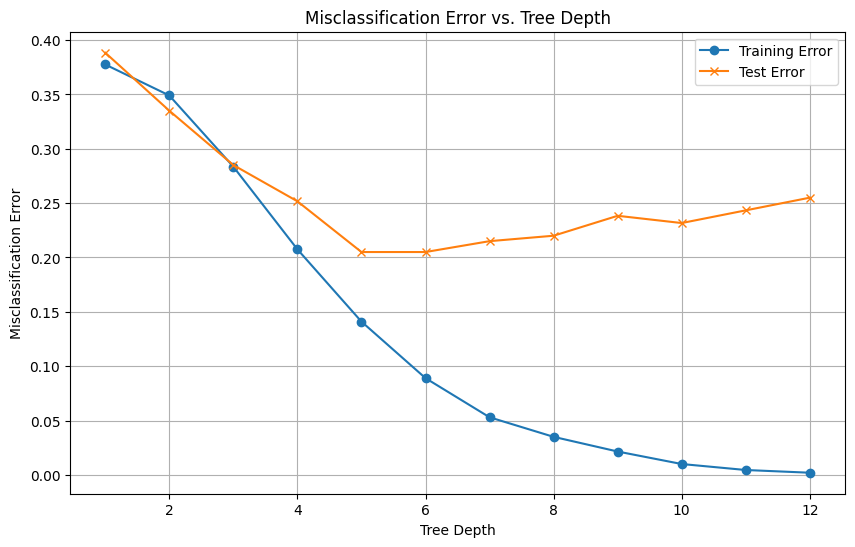

In [ ]:
# Plotting misclassification errors
plt.figure(figsize=(10, 6))
plt.plot(range(1,13), train_error, marker='o', label='Training Error')
plt.plot(range(1,13), test_error, marker='x', label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

The following shows the minimal test error and the corresponding tree depth.

In [ ]:
#Create a dataframe so that it looks nicer

table = {
    'Tree Depth': [test_error.index(min(test_error))+1],
    'Minimal Test Error': [min(test_error)]
}

df = pd.DataFrame(table)
df

,Tree Depth,Minimal Test Error
0,5,0.205


## Problem (b)

### Problem Statement
Repeat point a) on the satimage dataset. (2 points)

In [ ]:
train_error = []
test_error = []

# Create-train-predict decision trees and calculate misclassification rates
for depth in range(1,13):
    clf  = tree.DecisionTreeClassifier(max_depth=depth, random_state = 0)
    clf = clf.fit(satimage_x, satimage_y)

    train_pred = clf.predict(satimage_x)
    test_pred = clf.predict(satimage_x_test)

    train_error.append(1-metrics.accuracy_score(satimage_y, train_pred))
    test_error.append(1-metrics.accuracy_score(satimage_y_test, test_pred))

The following shows the graph contrasting the test error and the training error.

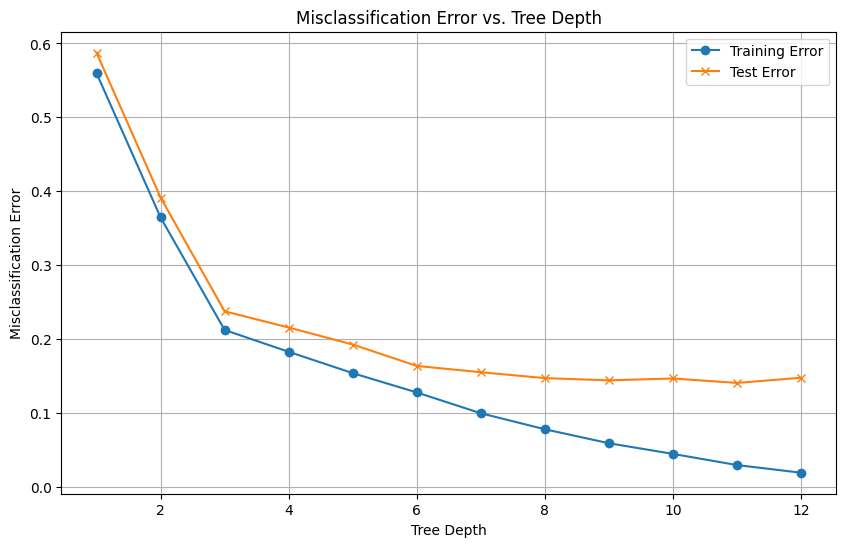

In [ ]:
# Plotting misclassification errors
plt.figure(figsize=(10, 6))
plt.plot(range(1,13), train_error, marker='o', label='Training Error')
plt.plot(range(1,13), test_error, marker='x', label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

The following shows the minimal test error and the corresponding tree depth.

In [ ]:
#Create a dataframe so that it looks nicer

table = {
    'Tree Depth': [test_error.index(min(test_error))+1],
    'Minimal Test Error': [min(test_error)]
}

df = pd.DataFrame(table)
df

,Tree Depth,Minimal Test Error
0,5,0.205


## Problem (c)

### Problem statement
On the madelon dataset, for each of $k \in \{3, 10, 30, 100, 300\}$ train a random
forest with $k$ trees where the split attribute at each node is chosen from a random
subset of $\sim \sqrt{500}$ features. Use the trained trees to predict the class labels on
the training and test sets, and obtain the training and test misclassification errors.
Plot on the same graph the training and test errors vs number of trees k as two
separate curves. Report the training and test misclassification errors in a table.
(3 points)


In [ ]:
train_error = []
test_error = []

forest_sizes = [3, 10, 30, 100, 300]

# Create-train-predict random forest and calculate misclassification rate
for size in forest_sizes:
    clf  = ensemble.RandomForestClassifier(n_estimators = size, max_features='sqrt', random_state=0)
    clf = clf.fit(madelon_x, madelon_y.values.ravel())

    train_pred = clf.predict(madelon_x)
    test_pred = clf.predict(madelon_x_test)

    train_error.append(1-metrics.accuracy_score(madelon_y, train_pred))
    test_error.append(1-metrics.accuracy_score(madelon_y_test, test_pred))

The following shows the graph contrasting the training error and the test error.

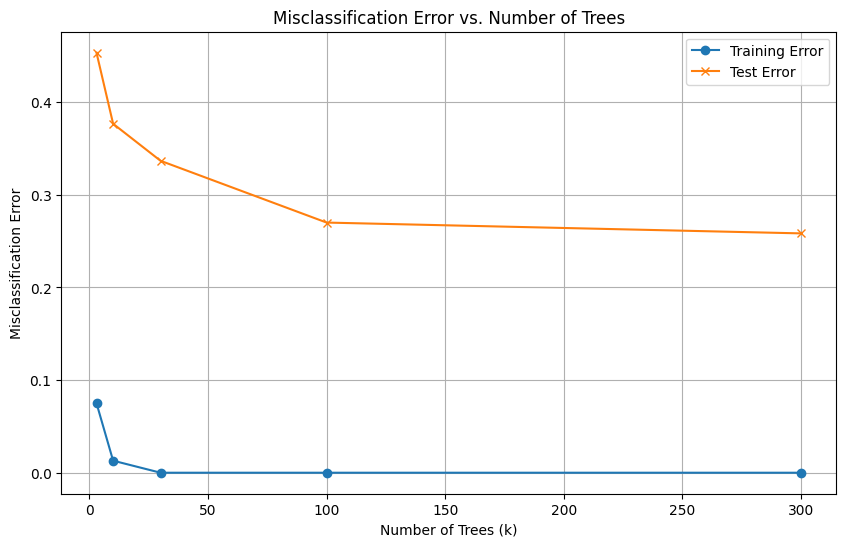

In [ ]:
# Plotting misclassification errors
plt.figure(figsize=(10, 6))
plt.plot(forest_sizes, train_error, marker='o', label='Training Error')
plt.plot(forest_sizes, test_error, marker='x', label='Test Error')
plt.xlabel('Number of Trees (k)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

The following table shows the training and test misclassification error.

In [ ]:
#Create a dataframe so that it looks nicer

table = {
    'Number of Trees': forest_sizes,
    'Training Error': train_error,
    'Test Error': test_error,
}

df = pd.DataFrame(table)
df

,Number of Trees,Training Error,Test Error
0,3,0.075,0.453333
1,10,0.013,0.376667
2,30,0.000,0.336667
3,100,0.000,0.270000
4,300,0.000,0.258333


## Problem (d)

### Problem Statement
Repeat point c) on the madelon dataset where the split attribute at each node is
chosen from a random subset of ∼ ln(500) features. (1 point)

In [ ]:
train_error = []
test_error = []

forest_sizes = [3, 10, 30, 100, 300]

# Create-train-predict random forest and calculate misclassification rate
for size in forest_sizes:
    clf  = ensemble.RandomForestClassifier(n_estimators = size, max_features=int(log(500)), random_state=0)
    clf = clf.fit(madelon_x, madelon_y.values.ravel())

    train_pred = clf.predict(madelon_x)
    test_pred = clf.predict(madelon_x_test)

    train_error.append(1-metrics.accuracy_score(madelon_y, train_pred))
    test_error.append(1-metrics.accuracy_score(madelon_y_test, test_pred))

The following shows the graph contrasting the training error and the test error.

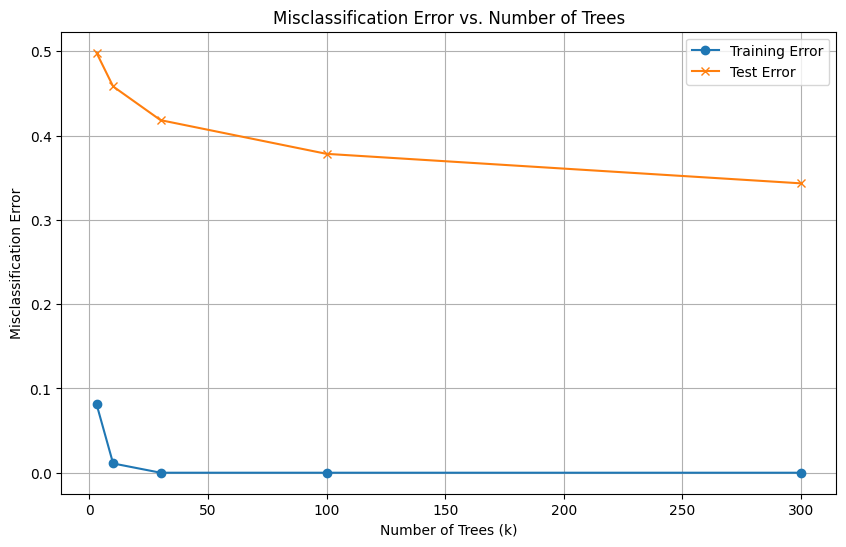

In [ ]:
# Plotting misclassification errors
plt.figure(figsize=(10, 6))
plt.plot(forest_sizes, train_error, marker='o', label='Training Error')
plt.plot(forest_sizes, test_error, marker='x', label='Test Error')
plt.xlabel('Number of Trees (k)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

The following table shows the training and test misclassification error.

In [ ]:
#Create a dataframe so that it looks nicer

table = {
    'Number of Trees': forest_sizes,
    'Training Error': train_error,
    'Test Error': test_error,
}

df = pd.DataFrame(table)
df

,Number of Trees,Training Error,Test Error
0,3,0.0815,0.498333
1,10,0.0110,0.458333
2,30,0.0000,0.418333
3,100,0.0000,0.378333
4,300,0.0000,0.343333


## Problem (e)

### Problem Statement
Repeat point c) on the madelon dataset where the split attribute at each node is
chosen from all 500 features. (1 point)

In [ ]:
train_error = []
test_error = []

forest_sizes = [3, 10, 30, 100, 300]

# Create-train-predict random forest and calculate misclassification rate
for size in forest_sizes:
    clf  = ensemble.RandomForestClassifier(n_estimators = size, max_features=500, random_state=0)
    clf = clf.fit(madelon_x, madelon_y.values.ravel())

    train_pred = clf.predict(madelon_x)
    test_pred = clf.predict(madelon_x_test)

    train_error.append(1-metrics.accuracy_score(madelon_y, train_pred))
    test_error.append(1-metrics.accuracy_score(madelon_y_test, test_pred))

The following shows the graph contrasting the training error and the test error.

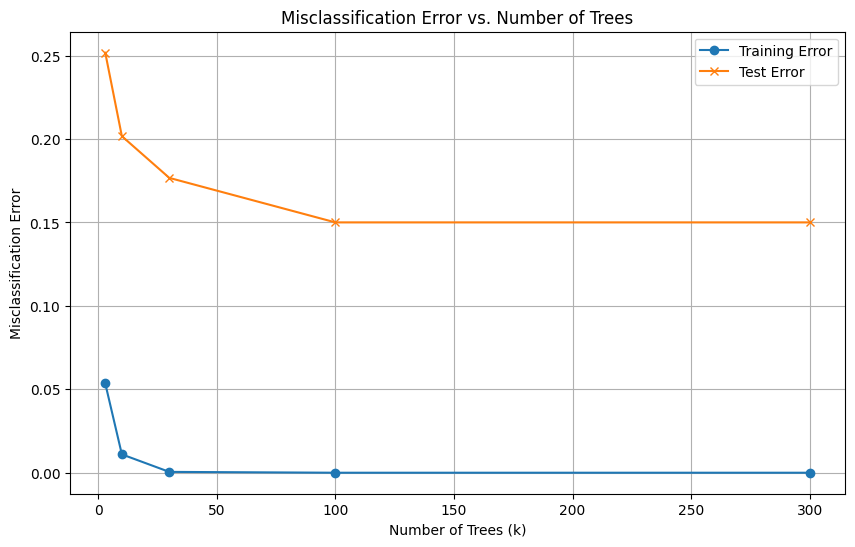

In [ ]:
# Plotting misclassification errors
plt.figure(figsize=(10, 6))
plt.plot(forest_sizes, train_error, marker='o', label='Training Error')
plt.plot(forest_sizes, test_error, marker='x', label='Test Error')
plt.xlabel('Number of Trees (k)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

The following table shows the training and test misclassification error.

In [ ]:
#Create a dataframe so that it looks nicer

table = {
    'Number of Trees': forest_sizes,
    'Training Error': train_error,
    'Test Error': test_error,
}

df = pd.DataFrame(table)
df

,Number of Trees,Training Error,Test Error
0,3,0.0535,0.251667
1,10,0.0110,0.201667
2,30,0.0005,0.176667
3,100,0.0000,0.150000
4,300,0.0000,0.150000
